In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Using TensorFlow backend.


coffee_mug (75.27%)


In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

import cv2
import PIL as pil
import requests
from io import BytesIO

In [3]:
# load the model
model = VGG16()

In [4]:
def get_label(image):
  # convert the image pixels to a numpy array
  image = img_to_array(image)
  # Resize image into 224, 224 as pre-trained model required
  image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # prepare the image for the VGG model
  image = preprocess_input(image)
  # predict the probability across all output classes
  yhat = model.predict(image)
  # convert the probabilities to class labels
  label = decode_predictions(yhat)
  return label

In [5]:
def get_img_from_url(url):
  # Request url for image in text format
  response = requests.get(url)
  # Read text reponse as image
  img = pil.Image.open(BytesIO(response.content))
  return img

In [9]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Donald_Trump_official_portrait.jpg/220px-Donald_Trump_official_portrait.jpg'
# Get image from url
img = get_img_from_url(url) 
# Get label(s) for image
label = get_label(img)
label

[[('n04350905', 'suit', 0.4419403),
  ('n04591157', 'Windsor_tie', 0.35365576),
  ('n10148035', 'groom', 0.13559358),
  ('n03838899', 'oboe', 0.00921674),
  ('n02883205', 'bow_tie', 0.008529572)]]

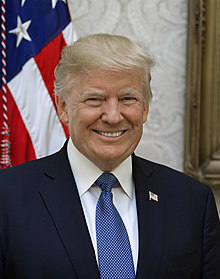

In [10]:
img